<a href="https://colab.research.google.com/github/zzaeyun/ESAA22-2/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_227to251_278to289.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **06 XGBoost(eXtra Gradient Boost)**

- 트리 기반의 앙상블 학습에서 가장 각광받고 있는 알고리즘
- 분류에 있어서 일반적으로 다른 머신러닝보다 뛰어난 예측 성능
- GBM에 기반하고 있지만 느린 수행 시간과 과적합 규제 부재 등의 문제를 해결
  - 뛰어난 예측 성능
  - GBM 대비 빠른 수행 ㅣㅅ간
  - 과적합 규제
  - Tree pruning (나무 가지치기)
  - 자체 내장된 교차 검증
  - 결손값 자체 처리

- XGBoost의 핵심 라이브러리는 C/C++로 작성
- 파이썬에서는 'xgboost' 패키지: 사이킷런 메서드와 함께 사용될 수 없음
- 사이킷런과 연동되는 모듈은 싸이킷런 래퍼 XGBoost 모듈 


---

**XGBoost 설치하기** 



In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

**파이썬 래퍼 XGBoost 하이퍼 파라미터**

GBM과 유사한 하이퍼 파라미터를 동일 + 조기 중단, 과적합을 규제하기 위한 하이퍼 파라미터 추가

- 일반 파라미터: 일반적으로 실행 시 스레드의 개수나 silent 모드 등의 선택을 위한 파라미터로서 디폴트 파라미터 값을 바꾸는 경우는 거의 없음
- 부스터 파라미터
  - 대부분의 하이퍼 파라미터는 Booster 파라미터에 속함
- 학습 태스크 파라미터


---

주요 일반 파라미터
- booster
- silent
- nthread

주요 부스터 파라미터
- eta [default=0.3, alias: learning_rate]: 학습률 learning rate와 같은 파라미터
- num_boost_rounds: n_estimators와 같은 파라미터
- min_child_weight [defalut=1]: 트리에서 추가적으로 가지를 나눌지 결정하기 위해 필요한 weight 총합 (값이 클수록 분할 자제)
- gamma [default=0, alias: min_split_loss]: 트리의 리프 노드를 추가적으로 나눌지 결정할 최소 손실 감소 값 (과적합 조절)
- max_depth[default=6]: max_depth와 동일
- sub_sample[defalut=1]: subsample과 동일
- colsample_bytree[default=1]: max_features와 유사
- lambda[default=1, alias: reg_lambda]: L2 Regulariztion 적용 값
- alpha[default=0, alias: reg_alpha]: L1 Regularization 적용 값
- scale_pos_weight[default=1]: 특정 값으로 치우친 비대칭한 클래스로 구성된 데이터 세트의 균형을 유지하기 위한 파라미터

학습 태스크 파라미터
- objective
- binary:logistic
- multi:softmax
- multi:softprob
- eval_metric
  - rmse
  - mae
  - logloss
  - error
  - merror
  - mlogloss
  - auc

뛰어난 알고리즘일수록 파라미터를 튜닝할 필요가 적음


---

과적합 문제가 심각하다면 적용할 수 있는 것
- eta 값을 낮춤: eta값을 낮출 경우 num_round(또는 n_estimators_는 반대로 높여주어야 함
- max_depth 값을 낮춤
- min_child_weight 값을 높임
- gamma 값을 높임
- subsample과 colsample_bytree 조정

XGBoost 자체적으로 교차 검증, 성능 평가, 피처 중요도 등의 시각화 기능 포함하며 GBM의 부족한 여러 가지 성능 향상 기능 포함

수행 속도를 향상 시키기 위한 기능 - **조기 중단(Early Stopping)**

- 기본 GBM의 경우 지정된 횟수만큼 반복적으로 학습 오류를 감소시키며 진행하면서 중간에 반복을 멈출 수 없음
- XGBoost와 LightGBM 모두 조기 중단 기능이 있어 n_estimators에 지정한 부스팅 반복 횟수에 도달하지 않더라도 예측 오류가 더 이상 개선되지 않으면 중지할 수 있음

### **파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측**

**위스콘신 유방암 데이터 세트**

종양의 크기, 모양 등의 다양한 속성값을 기반으로 악성 종양인지 양성 종양인지를 분류한 데이터 세트

In [ ]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset=load_breast_cancer()
X_features=dataset.data
y_label=dataset.target

cancer_df=pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']=y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [ ]:
#레이블 값의 분포 확인
print(dataset.target_names)
print(cancer_df['target'].value_counts())

# 1값이 양성 benign이 357개

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [ ]:
#전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label, test_size=0.2, random_state=156)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


**DMatrix**
- 학습용과 테스트용 데이터 세트를 위해 별도의 객체인 DMatrix를 생성
- 넘파이 입력 파라미터를 받아서 만들어지는 XGBoost만의 전용 데이터 세트

In [ ]:
dtrain=xgb.DMatrix(data=X_train, label=y_train)
dtest=xgb.DMatrix(data=X_test, label=y_test)

In [ ]:
#XGBoost의 하이퍼 파라미터는 딕셔너리 형태로 입력
params={'max_depth':3,
        'eta':0.1,
        'objective':'binary:logistic',
        'eval_metric':'logloss',
        'early_stoppings':100
        }
num_rounds=400

조기 중단은 xgboost의 train( ) 함수에 early_stopping_rounds 파라미터를 입력하여 설정
- early_stopping_rounds 파라미터를 설정해 조기 중단을 수행하기 위해서는 반드시 eval_set과 eval_metric이 함께 설정되어야 함
- eval_set는 성능 평가를 수행할 평가용 데이터 세트 설정
- eval_metric은 평가 세트에 적용할 성능 평가 방법, 분류일 경우 'error', 'logloss'를 적용


In [ ]:
#train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval'
wlist=[(dtrain, 'train'),(dtest, 'eval')]

#하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model=xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, early_stopping_rounds=100, evals=wlist)

[0]	train-logloss:0.609688	eval-logloss:0.61352
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 100 rounds.
[1]	train-logloss:0.540803	eval-logloss:0.547843
[2]	train-logloss:0.483753	eval-logloss:0.494248
[3]	train-logloss:0.434457	eval-logloss:0.447986
[4]	train-logloss:0.39055	eval-logloss:0.409109
[5]	train-logloss:0.354146	eval-logloss:0.374977
[6]	train-logloss:0.321222	eval-logloss:0.345714
[7]	train-logloss:0.292593	eval-logloss:0.320529
[8]	train-logloss:0.267467	eval-logloss:0.29721
[9]	train-logloss:0.245153	eval-logloss:0.277991
[10]	train-logloss:0.225694	eval-logloss:0.260302
[11]	train-logloss:0.207938	eval-logloss:0.246037
[12]	train-logloss:0.192184	eval-logloss:0.231556
[13]	train-logloss:0.177916	eval-logloss:0.22005
[14]	train-logloss:0.165222	eval-logloss:0.208572
[15]	train-logloss:0.153622	eval-logloss:0.199993
[16]	train-logloss:0.14333	eval-logloss:0.190118
[17]	train-logl

train( )으로 학습을 수행하면 반복 시 train-error와 eval-logloss가 지속적으로 감소

---

예측을 위해 predict( ) 메서드 이용
- xgboost의 predict( )는 예측 결괏값이 아닌 예측 결과를 추정할 수 있는 확률 값을 반환
- 그러므로 예측확률의 임곗값으로 예측 값을 결정하는 로직을 추가

In [ ]:
pred_probs=xgb_model.predict(dtest)
print('predict( ) 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10], 3))

preds=[1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:', preds[:10])

predict( ) 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨
[0.934 0.003 0.91  0.094 0.993 1.    1.    0.999 0.997 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [17]:
#get_clf_eval( ) 함수를 적용하여 예측 성능 평가

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
#confusion matrix, accuracy, precision, recall 등 다양한 평가 호출: **get_clf_eval( )**

def get_clf_eval(y_test, pred, pred_proba=None):
  confusion=confusion_matrix(y_test, pred)
  accuracy=accuracy_score(y_test, pred)
  precision=precision_score(y_test, pred)
  recall=recall_score(y_test, pred)
  f1=f1_score(y_test, pred)

  roc_auc=roc_auc_score(y_test, pred_proba)
  print('오차 행렬')
  print(confusion)

  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [18]:
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870, F1: 0.9806


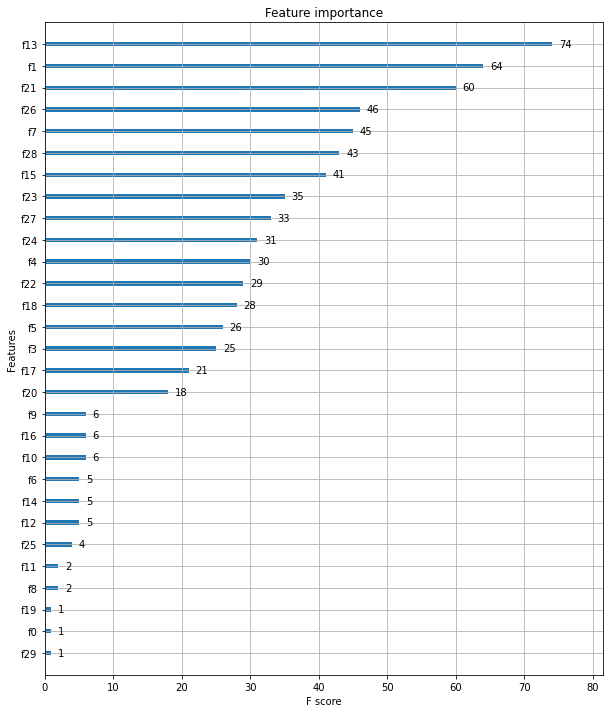

In [20]:
#xgboost 패키지에 내장된 시각화 기능 수행
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax=plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

- xgboost 모듈의 to_graphviz( )  API를 이용하면 규칙 트리 구조를 그릴 수 있음
- GridSearchCV와 유사한 cv( ) API 제공

### **사이킷런 래퍼 XGBoost의 개요 및 적용**

- 분류를 위한 래퍼 클래스 XGBClassifier
- 회귀를 위한 래퍼 클래스 XGBREgressor
- 하이퍼 미터 변환
  - eta → learning_rate
  - sub_sample → subsample
  - lambda → reg_lambda
  - alpha → reg_alpha

---
위스콘신 대학병원의 유방암 데이터 세트 분류를 XGBClassifier를 이용하여 예측


In [23]:
from xgboost import XGBClassifier

xgb_wrapper=XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds=xgb_wrapper.predict(X_test)
w_pred_proba=xgb_wrapper.predict_proba(X_test)[:,1]

In [24]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870, F1: 0.9806


파이썬 래퍼 XGBoost와 동일한 평가 결과

In [26]:
from xgboost import XGBClassifier


xgb_wrapper=XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals=[(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
ws100_preds=xgb_wrapper.predict(X_test)
ws100_pred_proba=xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912

n_estimators를 400으로 설정해도 400번 수행하지 않고 311 반복한 후 학습을 완료

211번에서 311번까지 100번의 반복동안 성능 평가 지수가 향상되지 않았기 때문

In [28]:
get_clf_eval(y_test, ws100_preds, ws100_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870, F1: 0.9744


조기 중단값을 너무 급격히 줄이면 예측 성능이 저하될 수 있음

In [29]:
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='logloss', eval_set=evals, verbose=True)
ws10_preds=xgb_wrapper.predict(X_test)
ws10_pred_proba=xgb_wrapper.predict_proba(X_test)[:,1]

get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912


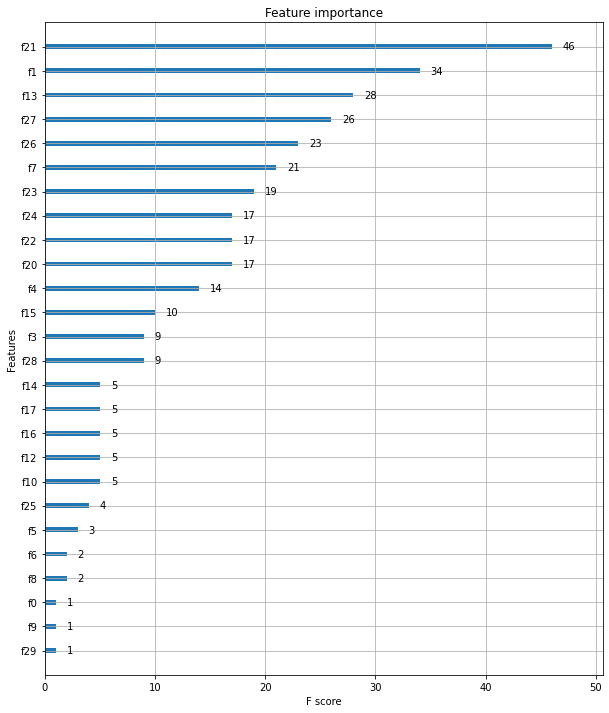

In [30]:
#피처의 중요도를 시각화 하는 모듈은 동일하게 작동
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax=plt.subplots(figsize=(10,12))
plot_importance(xgb_wrapper, ax=ax)

## **07 LightGBM**
XGBoosting 과 함께 부스팅 계열 알고리즘에서 가장 각광 받고 있음

- XGBoost도 여전히 학습 시간이 오래걸리는데 LightGBM은 걸리는 시간도 적고 메모리 사용량도 상대적으로 적음
- XGBoost와 LightGBM의 예측 성능은 유사
- LightGBM의 한 가지 단점은 적은 데이터 세트를 적용하면 과적합이 발생하기 쉬움
- 리프 중심 트리 분할 방식을 사용: 트리의 균형을 맞추지 않고 최대 손실 값을 가지는 리프 노드를 지속적으로 분할하면서 트리의 깊이가 깊어지고 비대칭 적인 규칙 트리 생성

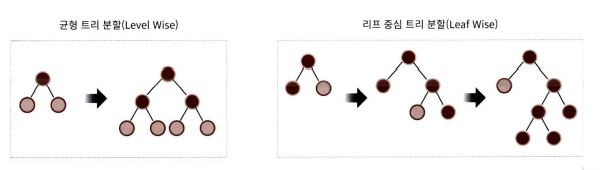

LightGBM의 장점 (XGBoost 대비)
- 더 빠른 학습과 예측 수행 시간
- 더 작은 메모리 사용량
- 카테고리형 피처의 자동 변환과 최적 분할(원-핫 인코딩 등을 사용하지 않고도 카테고리형 피처를 최적으로 변환하고 이에 따른 노드 분할 수행)

- 파이썬 패키지 명은 'lightgbm' 초기에는 파이썬 래퍼용만 개발 되었지만 사이킷런 래퍼 lightGBM이 추가로 개발

---
**LightGBM 하이퍼 파라미터**
- num_iterations [default=100]: 반복 수행하려는 트리의 개수 지정
- learning_rate [default=0.1]
- max_depth [default=-1]
- min_data_in_leaf [default=20]
- num_leabes [default=31]
- boosting [default=gbdf]
- bagging_fraction [default=1.0]
- feature_fraction [default=1.0]
- lambda_l2 [default=0.0]
- lambda_l1 [default=0.0]

**Learning Task 파라미터**
- objective: 최솟값을 가져야 할 손실함수를 정의

**하이퍼 파라미터 튜닝 방안**

num_leaves의 개수를 중심으로 min_child_samples(min_data_in_leaf), max_depth를 함께 조정하면서 모델의 복잡도를 줄이는 것이 기본 튜닝 방안

**파이썬 래퍼 LightGBM과 사이킷런 래퍼 XGBoost, LightGBM 하이퍼 파라미터 비교**


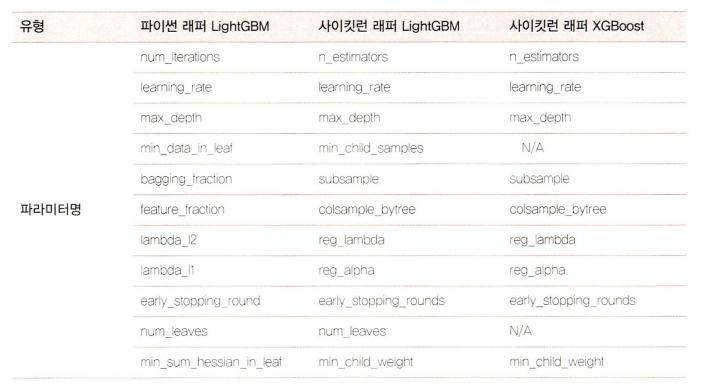

**LigthGBM 적용 - 위스콘신 유방안 예측**

In [31]:
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset=load_breast_cancer()
ftr=dataset.data
target=dataset.target

X_train, X_test, y_train, y_test = train_test_split(ftr, target, test_size=0.1, random_state=156)

lgbm_wrapper=LGBMClassifier(n_estimators=400)

evals=[(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
preds=lgbm_wrapper.predict(X_test)
pred_proba=lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	valid_0's binary_logloss: 0.566257	valid_0's binary_logloss: 0.566257
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.512086	valid_0's binary_logloss: 0.512086
[3]	valid_0's binary_logloss: 0.46283	valid_0's binary_logloss: 0.46283
[4]	valid_0's binary_logloss: 0.42183	valid_0's binary_logloss: 0.42183
[5]	valid_0's binary_logloss: 0.38844	valid_0's binary_logloss: 0.38844
[6]	valid_0's binary_logloss: 0.359048	valid_0's binary_logloss: 0.359048
[7]	valid_0's binary_logloss: 0.335037	valid_0's binary_logloss: 0.335037
[8]	valid_0's binary_logloss: 0.31252	valid_0's binary_logloss: 0.31252
[9]	valid_0's binary_logloss: 0.294486	valid_0's binary_logloss: 0.294486
[10]	valid_0's binary_logloss: 0.279445	valid_0's binary_logloss: 0.279445
[11]	valid_0's binary_logloss: 0.259164	valid_0's binary_logloss: 0.259164
[12]	valid_0's binary_logloss: 0.24194	valid_0's binary_logloss: 0.24194
[13]	valid_0's binary_logloss: 0.225866	valid_0's binary

In [32]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[17  1]
 [ 1 38]]
정확도: 0.9649, 정밀도: 0.9744, 재현율: 0.9744, F1: 0.9744


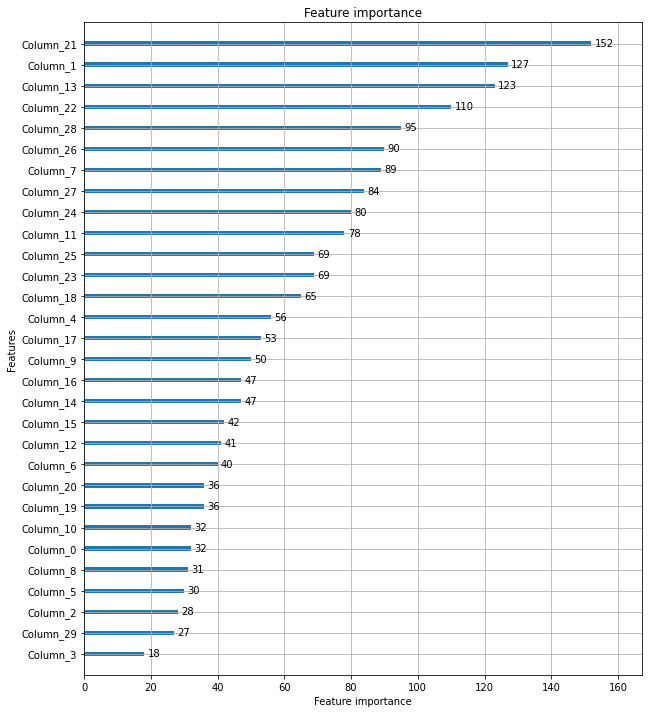

In [33]:
#lightgbm도 동일하게 피처 중요도 시각화 구현 가능
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax=plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)

pg.278

## **10 스태킹 앙상블**

- 스태킹은 개별적인 여러 알고리즘을 결합하여 예측 결과를 도출, 그리고 개별적인 알고리즘에서 예측한 데이터를 기반으로 다시 예측을 수행
- 개별 알고리즘의 예측 결과 데이터 세트를 최종적인 메타 데이터 세트로 만들어 별도의 ML 알고리즘으로 최종 학습을 수 행하고 테스트 데이터 기반으로 다시 최종 예측을 수행

---
스태킹 모델은 두 종류의 모델 필요
1. 개별적인 기반 모델
2. 개별 기반 모델의 예측 데이터를 학습 데이터로 만들어서 학습하는 최종 메타 모델


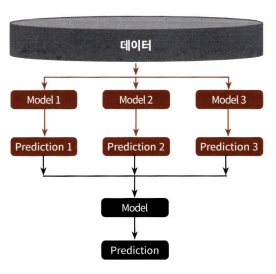

M개의 로우, N개의 피처를 가진 데이터 세트에 스태킹 앙상블을 적용
- 학습에 사용할 ML 알고리즘 모델은 모두 3개
- 모델별로 각각 학습 시킨 뒤 예측을 수행하면 각각 M개의 로우를 가진 1개의 레이블 값을 도출
- 모델별로 도출된 예측 레이블 값을 다시 합해서 새로운 데이터 세트를 만들어 최종 모델을 적용해 최종 예측을 하는 것이 스태킹 앙상블 모델

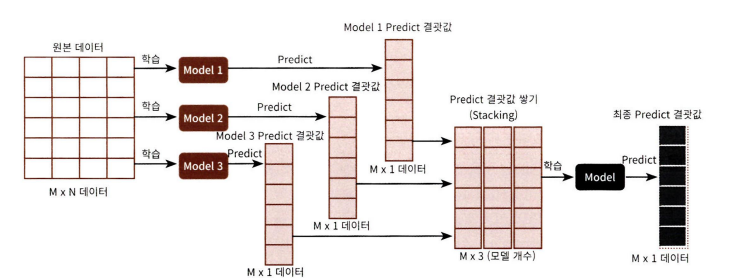

**기본 스태킹 모델**

In [34]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data=load_breast_cancer()

X_data=cancer_data.data
y_label=cancer_data.target

X_train, X_test, y_train, y_test=train_test_split(X_data, y_label, test_size=0.2, random_state=0)

- 개별 모델은 KNN, 랜덤 포레스트, 결정 트리, 에이다부스트
- 최종 모델은 로지스틱 회귀

In [36]:
#개별 ML 모델 생성
knn_clf=KNeighborsClassifier(n_neighbors=4)
rf_clf=RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf=DecisionTreeClassifier()
ada_clf=AdaBoostClassifier(n_estimators=100)

#최종 모델
lr_final=LogisticRegression(C=10)

In [39]:
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [40]:
knn_pred=knn_clf.predict(X_test)
rf_pred=rf_clf.predict(X_test)
dt_pred=dt_clf.predict(X_test)
ada_pred=ada_clf.predict(X_test)

print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도: {0:.4f}'.format(accuracy_score(y_test, ada_pred)))

KNN 정확도: 0.9211
랜덤 포레스트 정확도: 0.9649
결정 트리 정확도: 0.9123
에이다부스트 정확도: 0.9561


In [43]:
pred=np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

pred=np.transpose(pred)
print(pred.shape)

(4, 114)
(114, 4)


In [44]:
#최종 메타 모델인 로지스틱 회귀를 학습하고 예측 정확도 측정
lr_final.fit(pred, y_test)
final=lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, final)))

최종 메타 모델의 예측 정확도: 0.9737


**CV 세트 기반의 스태킹**

**스텝1**
- 학습용 데이터를 N개의 폴드로 나누기
- N번의 유사한 반복 작업을 수행하고 
- 마지막 N번째 반복에서 개별 모델의 예측값으로 학습 데이터와 테스트 데이터를 생성

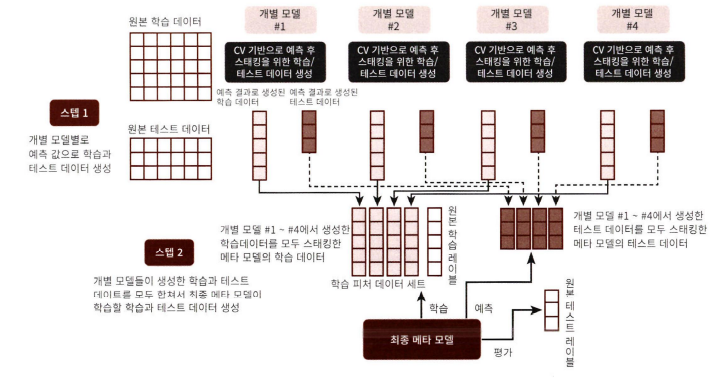

In [48]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성
    kf = KFold(n_splits=n_folds, shuffle=False)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    #학습
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
    
    # 테스트        
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [49]:
#여러 개의 분류 모델별로 stack_base_model( ) 함수를 수행

knn_train, knn_test=get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test=get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test=get_stacking_base_datasets(dt_clf, X_train, y_train, X_test, 7)
ada_train, ada_test=get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

KNeighborsClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
RandomForestClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
DecisionTreeClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
AdaBoostClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 


In [51]:
#스텝2 구현
Stack_final_X_train=np.concatenate((knn_train,rf_train, dt_train, ada_train), axis=1)
Stack_final_X_test=np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
print('원본 학습 피처 데이터 Shape:', X_train.shape, '원본 테스트 피처 Shape:', X_test.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape,
      '스태킹 테스트 피처 데이터 Shape:', Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape: (455, 30) 원본 테스트 피처 Shape: (114, 30)
스태킹 학습 피처 데이터 Shape: (455, 4) 스태킹 테스트 피처 데이터 Shape: (114, 4)


In [54]:
lr_final.fit(Stack_final_X_train, y_train)
stack_final=lr_final.predict(Stack_final_X_test)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, stack_final)))

최종 메타 모델의 예측 정확도: 0.9737


## **11 정리**

- 앙상블은 다수의 약한 학습기를 결합해 변동성을 줄여 예측 오류를 줄이고 성능을 개선
- 배깅과 부스팅으로 구분될 수 있으며, 배깅은 학습 데이터를 중복 허용: 랜덤 포레스트
- 현대에는 부스팅이 더 주류: GBM
- XGBoost, LightGBM은 가장 각광받는 부스팅 기반 머신러닝 패키지
- 다음 장에서는 지도학습의 또 다른 한 축인 회귀에 대해 알아봄